In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-chf/Data_CHF_Zhao_2020_ATE (1).csv


> # Import Libraries

In [47]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

In [48]:
df=pd.read_csv('/kaggle/input/data-chf/Data_CHF_Zhao_2020_ATE (1).csv')
df.head()

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,1,Inasaka,tube,0.39,5600,-0.1041,3.0,3.0,100,11.3
1,2,Inasaka,tube,0.31,6700,-0.0596,3.0,3.0,100,10.6
2,3,Inasaka,tube,0.33,4300,-0.0395,3.0,3.0,100,7.3
3,4,Inasaka,tube,0.62,6400,-0.1460,3.0,3.0,100,12.8
4,5,Inasaka,tube,0.64,4700,-0.0849,3.0,3.0,100,11.0


In [52]:
df.shape

(1865, 10)

In [53]:
# Define the new column names
new_column_names = ['id','author', 'geometry', 'pressure', 'mass_flux', 'exit_concentration',
            'equivalent_diameter', 'hydraulic_diameter', 'channel_length', 'exp_critical_heat_flux']
# Replace the column names wrt to df
df.columns = new_column_names

In [9]:
df.head()

,id,author,geometry,pressure,mass_flux,exit_concentration,equivalent_diameter,hydraulic_diameter,channel_length,exp_critical_heat_flux
0,1,Inasaka,tube,0.39,5600,-0.1041,3.0,3.0,100,11.3
1,2,Inasaka,tube,0.31,6700,-0.0596,3.0,3.0,100,10.6
2,3,Inasaka,tube,0.33,4300,-0.0395,3.0,3.0,100,7.3
3,4,Inasaka,tube,0.62,6400,-0.1460,3.0,3.0,100,12.8
4,5,Inasaka,tube,0.64,4700,-0.0849,3.0,3.0,100,11.0


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1865.0,933.000000,538.523444,1.0000,467.0000,933.0000,1399.0000,1865.000
pressure,1865.0,10.010949,4.282715,0.1000,6.8900,10.3400,13.7900,20.680
mass_flux,1865.0,2862.647721,1656.412247,0.0000,1519.0000,2590.0000,3933.0000,7975.000
exit_concentration,1865.0,0.016179,0.117575,-0.8667,-0.0483,0.0244,0.1006,0.232
equivalent_diameter,1865.0,9.417212,6.333807,1.0000,5.6000,8.5000,11.1000,37.500
hydraulic_diameter,1865.0,16.167721,21.182870,1.0000,5.6000,10.3000,15.2000,120.000
channel_length,1865.0,911.340483,726.718974,10.0000,432.0000,625.0000,1778.0000,3048.000
exp_critical_heat_flux,1865.0,3.854638,1.985535,0.8000,2.4000,3.5000,4.8000,19.300


> # Exploratory Data Analysis

<Axes: >

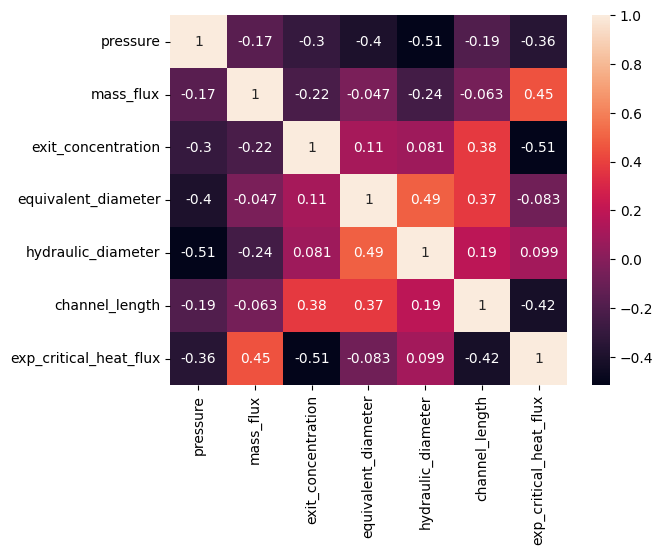

In [43]:
corr_df=df.iloc[:,3:].corr()
sns.heatmap(corr_df,annot=True)

<div class="alert alert-block alert-warning" style="border: 3px solid #f0ad4e; background-color: #fcf8e3; padding: 10px;">
<p>
    <font color = black><b>Observations :</b></font>
</p>
<font color = black>

>The heatmap plot provides a visual representation of the correlation between different features in the dataset. It helps in understanding the strength and direction of the relationships between variables, highlighting potential patterns or dependencies in the data.Geometry and author are almost correlate each other we can drop any one.
</font>
</div>

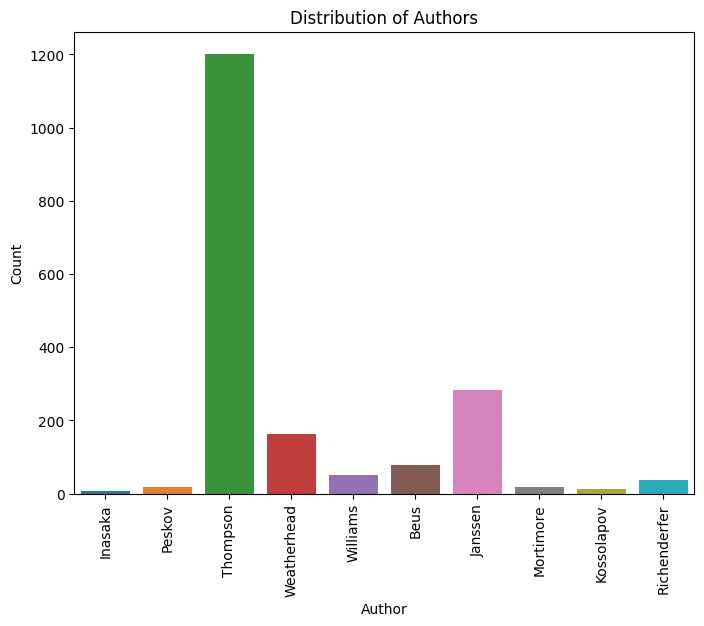

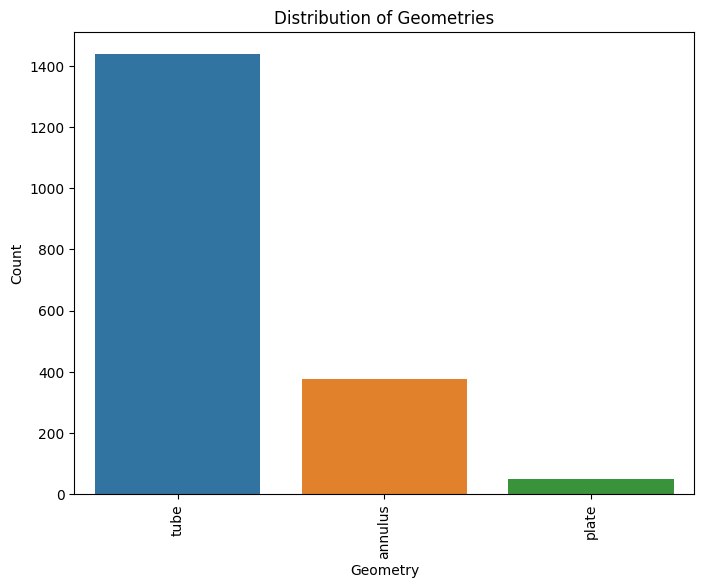

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a subset of the DataFrame with the "author" and "geometry" columns
subset = df[["author", "geometry"]]

# Drop rows with missing values in either "author" or "geometry" columns
subset = subset.dropna(subset=["author", "geometry"])

# Plot the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=subset, x="author")
sns.countplot(data=subset, x="author")
plt.title("Distribution of Authors")
plt.xlabel("Author")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=subset, x="geometry")
plt.title("Distribution of Geometries")
plt.xlabel("Geometry")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-warning" style="border: 3px solid #f0ad4e; background-color: #fcf8e3; padding: 10px;">
<p><font color = black > <b>Observations:</b></font></p>
<font color = black>
<ol>
By analyzing the visualization, we can confidently conclude that the dataset predominantly consists of instances where
approximately 70% of the geometry tube has been utilized. This finding provides valuable insights into the distribution and
usage patterns within the dataset, highlighting the significance of this specific geometry tube configuration in the context
of the study or analysis being conducted.
    </ol> 
</font>
</div>

In [12]:
# create a crosstab for better understand
# Created contigency table to check of author and geometry statistically
ctg = pd.crosstab(df['author'],df['geometry'])

# Apply styling to the DataFrame
ctg_df = ctg.style.set_table_styles([
    {'selector': 'table', 'props': [('border', '1px solid black'), ('border-collapse', 'collapse')]},
    {'selector': 'th', 'props': [('border', '1px solid black'), ('padding', '8px'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('border', '1px solid black'), ('padding', '8px'), ('text-align', 'center')]}
])
ctg_df

geometry,annulus,plate,tube
author,,,
Beus,77,0,0
Inasaka,0,0,7
Janssen,282,0,0
Kossolapov,0,12,0
Mortimore,19,0,0
Peskov,0,0,17
Richenderfer,0,36,0
Thompson,0,0,1202
Weatherhead,0,0,162


### checking for missing values

In [15]:
df.isnull().sum()

id                        0
author                    0
geometry                  0
pressure                  0
mass_flux                 0
exit_concentration        0
equivalent_diameter       0
hydraulic_diameter        0
channel_length            0
exp_critical_heat_flux    0
dtype: int64

## Distribution plots with respect to each geometry

In [26]:
df['geometry'].unique()

array(['tube', 'annulus', 'plate'], dtype=object)

## TUBE

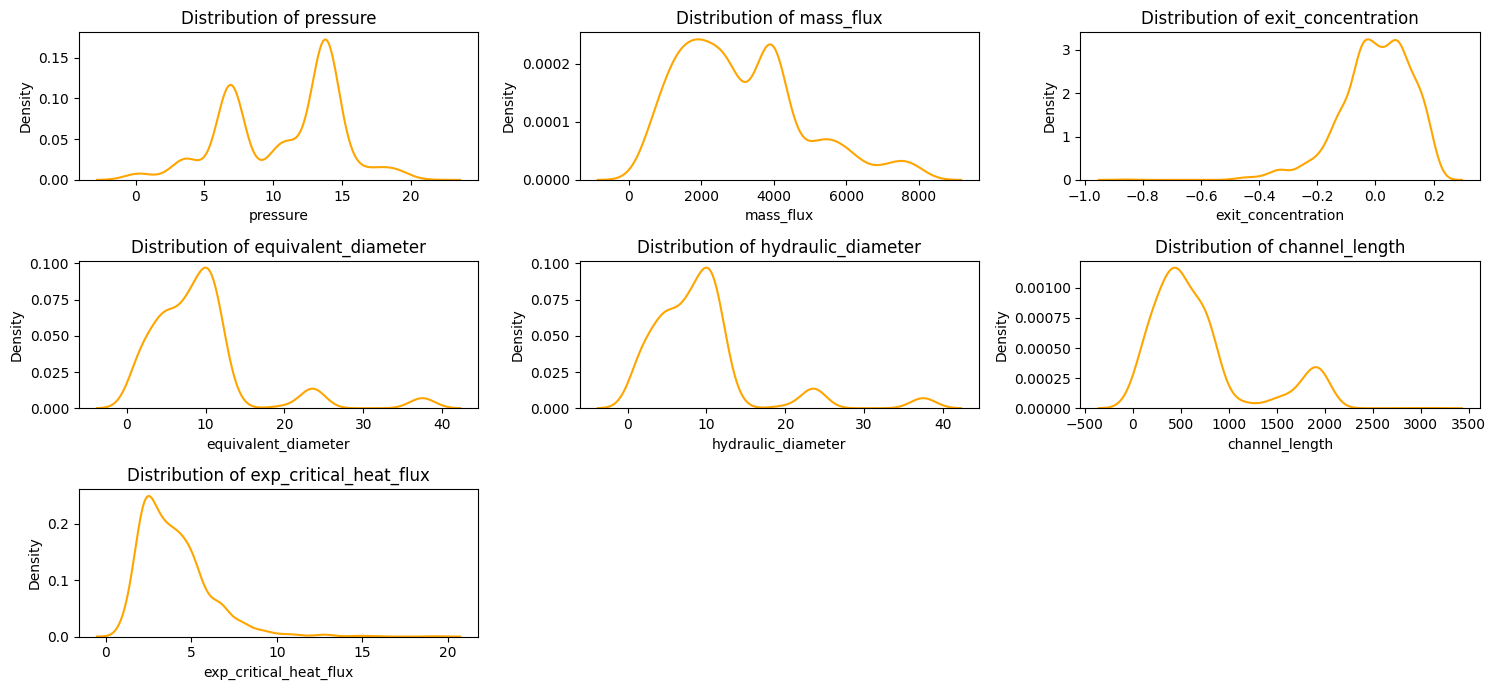

In [27]:
# create sepearnuniquef for each unique geometry for analysis
Tube = df[df['geometry']=='tube']
# check the distribution of the dataset withrespect to each geometry
plt.figure(figsize=(15, 7))
for i, feature in enumerate(Tube.iloc[:,3:]):
    plt.subplot(3, 3, i + 1)
    sns.distplot(Tube[feature], color='orange', hist=False, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

## ANNULUS

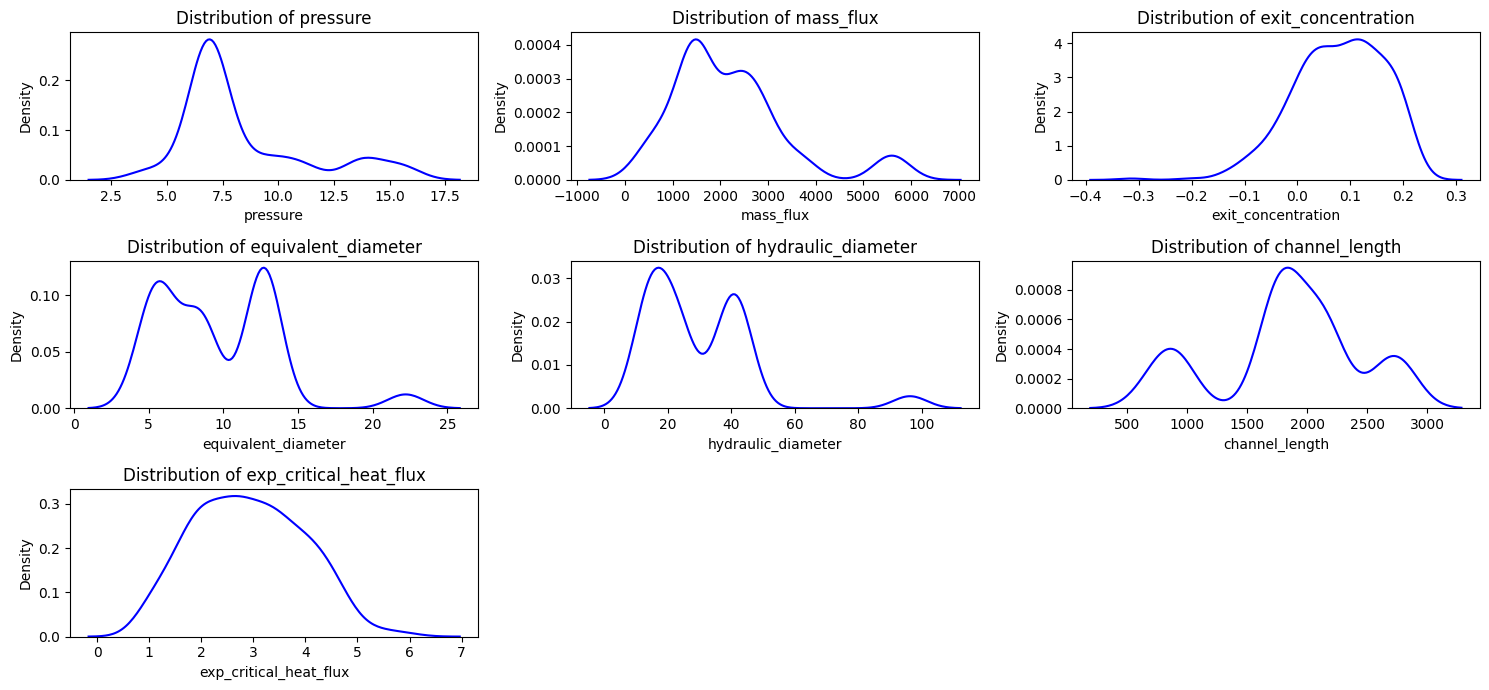

In [29]:
Annulus = df[df['geometry']=='annulus']
# check the distribution of the dataset with respect to each geometry

plt.figure(figsize=(15, 7))
for i, feature in enumerate(Annulus.iloc[:,3:]):
    plt.subplot(3, 3, i + 1)
    sns.distplot(Annulus[feature], color='blue', hist=False, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

## PLATE

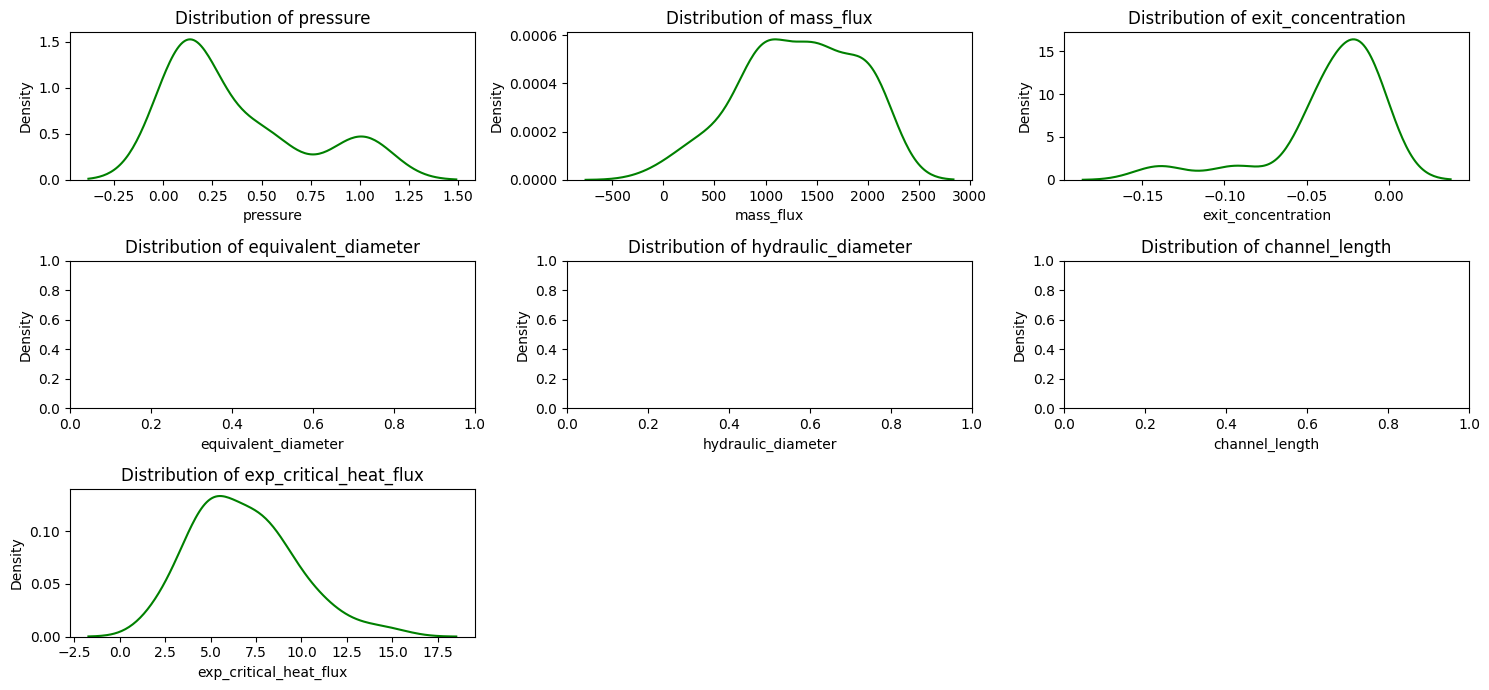

In [30]:
Plate = df[df['geometry']=='plate'] 
# check the distribution of the dataset with respect to each geometry

plt.figure(figsize=(15, 7))
for i, feature in enumerate(Plate.iloc[:,3:]):
    plt.subplot(3, 3, i + 1)
    sns.distplot(Plate[feature], color='green', hist=False, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

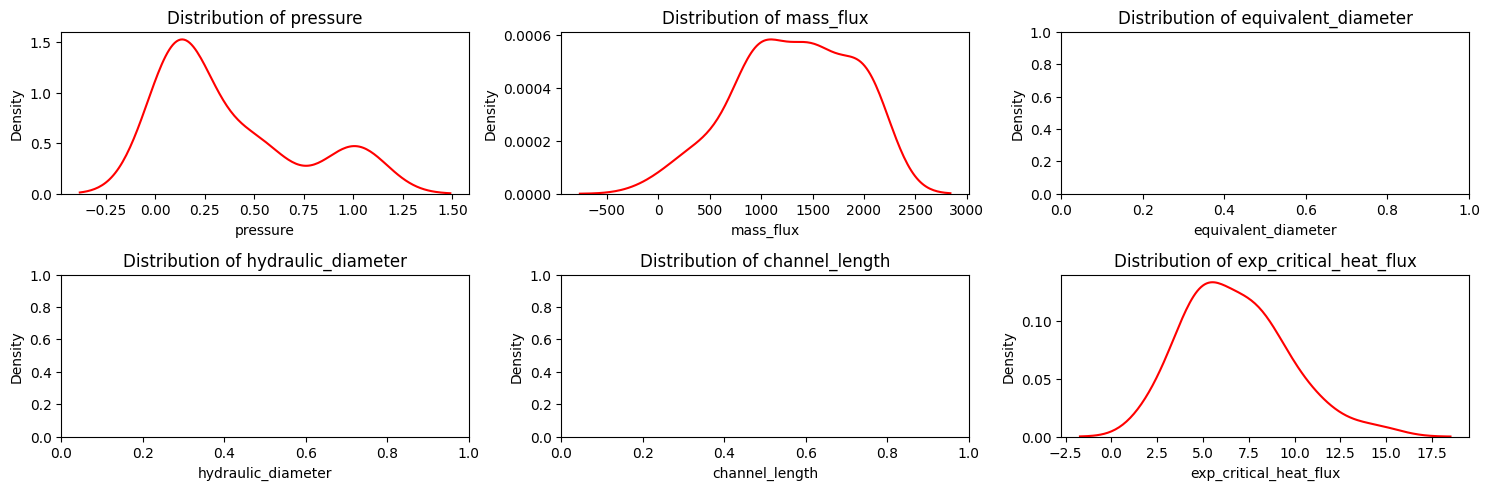

In [32]:
# check the distribution of the dataset with respect to each geometry
original_df1=df.drop('exit_concentration',axis=1)

plt.figure(figsize=(15, 7))
for i, feature in enumerate(original_df1.iloc[:,3:]):
    plt.subplot(3, 3, i + 1)
    sns.distplot(Plate[feature], color='red', hist=False, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

## Label Encoding 

In [49]:
# Apply label encoding to 'author' and 'geometry' columns
label_encoder = LabelEncoder()
df['author'] = label_encoder.fit_transform(df['author'])
df['geometry'] = label_encoder.fit_transform(df['geometry'])

> # Model Building

In [55]:
# Split the data into features and target variable
X = df.drop(['id','exp_critical_heat_flux'], axis=1)
y = df['exp_critical_heat_flux']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation ='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,201
Trainable params: 3,201
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

In [58]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)

# Calculate the metrics
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)
print("Mean Square Error:",mse)
print("Root Mean Square Error:",np.sqrt(mse))

12/12 [==============================] - 0s 2ms/step
R2 Score: 0.8973153092833899
Mean Square Error: 0.4409874265585408
Root Mean Square Error: 0.6640688417314433
